In [1]:
using DifferentialEquations

In [2]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


In [127]:
function df4(du,u,p,y)
    k=1
    du[1]=u[2]
    du[2]=-u[2]/y-k^2*u[1]
end

df4 (generic function with 3 methods)

In [196]:
function fill_pos(pos_i,pos_j,x,y,map,i,j,size)
    for ii in pos_i
        for jj in pos_j
            r_ij=(x[i]^2+x[j]^2)^(1/2)
            map[ii,jj]=fill_values(x,y,r_ij,i,j,size)
        end 
    end
end 

fill_pos (generic function with 1 method)

In [192]:
function fill_values(x,y,r_ij,i,j,size)
    istrue=true
    n=1
    value=0
    while istrue && n<size-1
        if r_ij-x[n]<=x[n]
            value=y[n]
            istrue=false
        else
            n+=1
        end 
    end 
    return value
end 

fill_values (generic function with 1 method)

In [198]:
function pos_values(pos,size)
    return [size-pos+1,size+pos]
end 

pos_values (generic function with 1 method)

In [190]:
function fill_map(x,y,map,size)
    for i in 1:size
        pos_i=pos_values(i,size)
        for j in 1:size
            pos_j=pos_values(j,size)
            fill_pos(pos_i,pos_j,x,y,map,i,j,size)
        end
    end
end 

fill_map (generic function with 2 methods)

In [177]:
function obtain_size(x)
    size=0
    for i in x
        size+=1
    end
    return size
end 

obtain_size (generic function with 1 method)

In [101]:
u0=[0.01,1]
min_value,max_value=0.1,100

100×100 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [128]:
model = ODEProblem(df4,u0,(min_value,max_value))

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.1, 100.0)
u0: [0.01, 1.0]

In [129]:
y = solve(model, Vern9(), abs_tol=1e-16, rel_tol=1e-16)

retcode: Success
Interpolation: specialized 9th order lazy interpolation
t: 75-element Array{Float64,1}:
   0.1
   0.1147688564604942
   0.15225160854723882
   0.21264522950043074
   0.30222533789270994
   0.4338143468559232
   0.6273617743727465
   0.9126324802162356
   1.3301967409154543
   1.9204706159906535
   2.7593471870813326
   3.837552822223223
   4.974184437929129
   ⋮
  83.26517374675382
  84.83689052431808
  86.40795912594336
  87.97972873947045
  89.5508745976113
  91.12269067558655
  92.69390534320645
  94.26576234931886
  95.83703831766508
  97.40893102991924
  98.98026152003001
 100.0
u: 75-element Array{Array{Float64,1},1}:
 [0.01, 1.0]
 [0.023773454464231316, 0.8710787952204602]
 [0.05200531649582539, 0.6553393081102618]
 [0.08523429344056868, 0.4655636481646461]
 [0.11968570929611361, 0.3195935549315553]
 [0.15357535348386442, 0.20715059243516193]
 [0.18397327818743098, 0.11522485569869391]
 [0.20410847910361085, 0.031883333368959765]
 [0.19921208390742667, -0.050058

In [185]:
x_sol=convert(Array,y.t)
y_sol=convert(Array,y)[1,:]
size=obtain_size(y_sol)

75

In [194]:
map=zeros(2*size,2*size)
r=2^(1/2)*x_sol

75-element Array{Float64,1}:
   0.14142135623730953
   0.16230767334448193
   0.21531628970062458
   0.30072576753344854
   0.42741117174066173
   0.6135061328756727
   0.8872235298323878
   1.2906572309839957
   1.8811822716271256
   2.7159555912729947
   3.9023062152664707
   5.4271192475112295
   7.034559093864565
   ⋮
 117.75473798601143
 119.97748116905215
 122.19930769288916
 124.42212559726508
 126.64406137831419
 128.86694499334288
 131.08897808569048
 133.3119195818458
 135.53403936651196
 137.75703135877723
 139.97922824886223
 141.4213562373095

In [199]:
fill_map(r,y_sol,map,size)

7575
7576
7675
7676
7574
7577
7674
7677
7573
7578
7673
7678
7572
7579
7672
7679
7571
7580
7671
7680
7570
7581
7670
7681
7569
7582
7669
7682
7568
7583
7668
7683
7567
7584
7667
7684
7566
7585
7666
7685
7565
7586
7665
7686
7564
7587
7664
7687
7563
7588
7663
7688
7562
7589
7662
7689
7561
7590
7661
7690
7560
7591
7660
7691
7559
7592
7659
7692
7558
7593
7658
7693
7557
7594
7657
7694
7556
7595
7656
7695
7555
7596
7655
7696
7554
7597
7654
7697
7553
7598
7653
7698
7552
7599
7652
7699
7551
75100
7651
76100
7550
75101
7650
76101
7549
75102
7649
76102
7548
75103
7648
76103
7547
75104
7647
76104
7546
75105
7646
76105
7545
75106
7645
76106
7544
75107
7644
76107
7543
75108
7643
76108
7542
75109
7642
76109
7541
75110
7641
76110
7540
75111
7640
76111
7539
75112
7639
76112
7538
75113
7638
76113
7537
75114
7637
76114
7536
75115
7636
76115
7535
75116
7635
76116
7534
75117
7634
76117
7533
75118
7633
76118
7532
75119
7632
76119
7531
75120
7631
76120
7530
75121
7630
76121
7529
75122
7629
76122
7528
75123
762

68123
8328
83123
6827
68124
8327
83124
6826
68125
8326
83125
6825
68126
8325
83126
6824
68127
8324
83127
6823
68128
8323
83128
6822
68129
8322
83129
6821
68130
8321
83130
6820
68131
8320
83131
6819
68132
8319
83132
6818
68133
8318
83133
6817
68134
8317
83134
6816
68135
8316
83135
6815
68136
8315
83136
6814
68137
8314
83137
6813
68138
8313
83138
6812
68139
8312
83139
6811
68140
8311
83140
6810
68141
8310
83141
689
68142
839
83142
688
68143
838
83143
687
68144
837
83144
686
68145
836
83145
685
68146
835
83146
684
68147
834
83147
683
68148
833
83148
682
68149
832
83149
681
68150
831
83150
6775
6776
8475
8476
6774
6777
8474
8477
6773
6778
8473
8478
6772
6779
8472
8479
6771
6780
8471
8480
6770
6781
8470
8481
6769
6782
8469
8482
6768
6783
8468
8483
6767
6784
8467
8484
6766
6785
8466
8485
6765
6786
8465
8486
6764
6787
8464
8487
6763
6788
8463
8488
6762
6789
8462
8489
6761
6790
8461
8490
6760
6791
8460
8491
6759
6792
8459
8492
6758
6793
8458
8493
6757
6794
8457
8494
6756
6795
8456
8495
6755
67

915
91146
604
60147
914
91147
603
60148
913
91148
602
60149
912
91149
601
60150
911
91150
5975
5976
9275
9276
5974
5977
9274
9277
5973
5978
9273
9278
5972
5979
9272
9279
5971
5980
9271
9280
5970
5981
9270
9281
5969
5982
9269
9282
5968
5983
9268
9283
5967
5984
9267
9284
5966
5985
9266
9285
5965
5986
9265
9286
5964
5987
9264
9287
5963
5988
9263
9288
5962
5989
9262
9289
5961
5990
9261
9290
5960
5991
9260
9291
5959
5992
9259
9292
5958
5993
9258
9293
5957
5994
9257
9294
5956
5995
9256
9295
5955
5996
9255
9296
5954
5997
9254
9297
5953
5998
9253
9298
5952
5999
9252
9299
5951
59100
9251
92100
5950
59101
9250
92101
5949
59102
9249
92102
5948
59103
9248
92103
5947
59104
9247
92104
5946
59105
9246
92105
5945
59106
9245
92106
5944
59107
9244
92107
5943
59108
9243
92108
5942
59109
9242
92109
5941
59110
9241
92110
5940
59111
9240
92111
5939
59112
9239
92112
5938
59113
9238
92113
5937
59114
9237
92114
5936
59115
9236
92115
5935
59116
9235
92116
5934
59117
9234
92117
5933
59118
9233
92118
5932
59119
9

5267
5284
9967
9984
5266
5285
9966
9985
5265
5286
9965
9986
5264
5287
9964
9987
5263
5288
9963
9988
5262
5289
9962
9989
5261
5290
9961
9990
5260
5291
9960
9991
5259
5292
9959
9992
5258
5293
9958
9993
5257
5294
9957
9994
5256
5295
9956
9995
5255
5296
9955
9996
5254
5297
9954
9997
5253
5298
9953
9998
5252
5299
9952
9999
5251
52100
9951
99100
5250
52101
9950
99101
5249
52102
9949
99102
5248
52103
9948
99103
5247
52104
9947
99104
5246
52105
9946
99105
5245
52106
9945
99106
5244
52107
9944
99107
5243
52108
9943
99108
5242
52109
9942
99109
5241
52110
9941
99110
5240
52111
9940
99111
5239
52112
9939
99112
5238
52113
9938
99113
5237
52114
9937
99114
5236
52115
9936
99115
5235
52116
9935
99116
5234
52117
9934
99117
5233
52118
9933
99118
5232
52119
9932
99119
5231
52120
9931
99120
5230
52121
9930
99121
5229
52122
9929
99122
5228
52123
9928
99123
5227
52124
9927
99124
5226
52125
9926
99125
5225
52126
9925
99126
5224
52127
9924
99127
5223
52128
9923
99128
5222
52129
9922
99129
5221
52130
9921
9913

45130
10621
106130
4520
45131
10620
106131
4519
45132
10619
106132
4518
45133
10618
106133
4517
45134
10617
106134
4516
45135
10616
106135
4515
45136
10615
106136
4514
45137
10614
106137
4513
45138
10613
106138
4512
45139
10612
106139
4511
45140
10611
106140
4510
45141
10610
106141
459
45142
1069
106142
458
45143
1068
106143
457
45144
1067
106144
456
45145
1066
106145
455
45146
1065
106146
454
45147
1064
106147
453
45148
1063
106148
452
45149
1062
106149
451
45150
1061
106150
4475
4476
10775
10776
4474
4477
10774
10777
4473
4478
10773
10778
4472
4479
10772
10779
4471
4480
10771
10780
4470
4481
10770
10781
4469
4482
10769
10782
4468
4483
10768
10783
4467
4484
10767
10784
4466
4485
10766
10785
4465
4486
10765
10786
4464
4487
10764
10787
4463
4488
10763
10788
4462
4489
10762
10789
4461
4490
10761
10790
4460
4491
10760
10791
4459
4492
10759
10792
4458
4493
10758
10793
4457
4494
10757
10794
4456
4495
10756
10795
4455
4496
10755
10796
4454
4497
10754
10797
4453
4498
10753
10798
4452
4499
107

3863
3888
11363
11388
3862
3889
11362
11389
3861
3890
11361
11390
3860
3891
11360
11391
3859
3892
11359
11392
3858
3893
11358
11393
3857
3894
11357
11394
3856
3895
11356
11395
3855
3896
11355
11396
3854
3897
11354
11397
3853
3898
11353
11398
3852
3899
11352
11399
3851
38100
11351
113100
3850
38101
11350
113101
3849
38102
11349
113102
3848
38103
11348
113103
3847
38104
11347
113104
3846
38105
11346
113105
3845
38106
11345
113106
3844
38107
11344
113107
3843
38108
11343
113108
3842
38109
11342
113109
3841
38110
11341
113110
3840
38111
11340
113111
3839
38112
11339
113112
3838
38113
11338
113113
3837
38114
11337
113114
3836
38115
11336
113115
3835
38116
11335
113116
3834
38117
11334
113117
3833
38118
11333
113118
3832
38119
11332
113119
3831
38120
11331
113120
3830
38121
11330
113121
3829
38122
11329
113122
3828
38123
11328
113123
3827
38124
11327
113124
3826
38125
11326
113125
3825
38126
11325
113126
3824
38127
11324
113127
3823
38128
11323
113128
3822
38129
11322
113129
3821
38130
11321

3358
3393
11858
11893
3357
3394
11857
11894
3356
3395
11856
11895
3355
3396
11855
11896
3354
3397
11854
11897
3353
3398
11853
11898
3352
3399
11852
11899
3351
33100
11851
118100
3350
33101
11850
118101
3349
33102
11849
118102
3348
33103
11848
118103
3347
33104
11847
118104
3346
33105
11846
118105
3345
33106
11845
118106
3344
33107
11844
118107
3343
33108
11843
118108
3342
33109
11842
118109
3341
33110
11841
118110
3340
33111
11840
118111
3339
33112
11839
118112
3338
33113
11838
118113
3337
33114
11837
118114
3336
33115
11836
118115
3335
33116
11835
118116
3334
33117
11834
118117
3333
33118
11833
118118
3332
33119
11832
118119
3331
33120
11831
118120
3330
33121
11830
118121
3329
33122
11829
118122
3328
33123
11828
118123
3327
33124
11827
118124
3326
33125
11826
118125
3325
33126
11825
118126
3324
33127
11824
118127
3323
33128
11823
118128
3322
33129
11822
118129
3321
33130
11821
118130
3320
33131
11820
118131
3319
33132
11819
118132
3318
33133
11818
118133
3317
33134
11817
118134
3316
3

268
26143
1258
125143
267
26144
1257
125144
266
26145
1256
125145
265
26146
1255
125146
264
26147
1254
125147
263
26148
1253
125148
262
26149
1252
125149
261
26150
1251
125150
2575
2576
12675
12676
2574
2577
12674
12677
2573
2578
12673
12678
2572
2579
12672
12679
2571
2580
12671
12680
2570
2581
12670
12681
2569
2582
12669
12682
2568
2583
12668
12683
2567
2584
12667
12684
2566
2585
12666
12685
2565
2586
12665
12686
2564
2587
12664
12687
2563
2588
12663
12688
2562
2589
12662
12689
2561
2590
12661
12690
2560
2591
12660
12691
2559
2592
12659
12692
2558
2593
12658
12693
2557
2594
12657
12694
2556
2595
12656
12695
2555
2596
12655
12696
2554
2597
12654
12697
2553
2598
12653
12698
2552
2599
12652
12699
2551
25100
12651
126100
2550
25101
12650
126101
2549
25102
12649
126102
2548
25103
12648
126103
2547
25104
12647
126104
2546
25105
12646
126105
2545
25106
12645
126106
2544
25107
12644
126107
2543
25108
12643
126108
2542
25109
12642
126109
2541
25110
12641
126110
2540
25111
12640
126111
2539
251

2025
20126
13125
131126
2024
20127
13124
131127
2023
20128
13123
131128
2022
20129
13122
131129
2021
20130
13121
131130
2020
20131
13120
131131
2019
20132
13119
131132
2018
20133
13118
131133
2017
20134
13117
131134
2016
20135
13116
131135
2015
20136
13115
131136
2014
20137
13114
131137
2013
20138
13113
131138
2012
20139
13112
131139
2011
20140
13111
131140
2010
20141
13110
131141
209
20142
1319
131142
208
20143
1318
131143
207
20144
1317
131144
206
20145
1316
131145
205
20146
1315
131146
204
20147
1314
131147
203
20148
1313
131148
202
20149
1312
131149
201
20150
1311
131150
1975
1976
13275
13276
1974
1977
13274
13277
1973
1978
13273
13278
1972
1979
13272
13279
1971
1980
13271
13280
1970
1981
13270
13281
1969
1982
13269
13282
1968
1983
13268
13283
1967
1984
13267
13284
1966
1985
13266
13285
1965
1986
13265
13286
1964
1987
13264
13287
1963
1988
13263
13288
1962
1989
13262
13289
1961
1990
13261
13290
1960
1991
13260
13291
1959
1992
13259
13292
1958
1993
13258
13293
1957
1994
13257
13294


13123
13828
138123
1327
13124
13827
138124
1326
13125
13826
138125
1325
13126
13825
138126
1324
13127
13824
138127
1323
13128
13823
138128
1322
13129
13822
138129
1321
13130
13821
138130
1320
13131
13820
138131
1319
13132
13819
138132
1318
13133
13818
138133
1317
13134
13817
138134
1316
13135
13816
138135
1315
13136
13815
138136
1314
13137
13814
138137
1313
13138
13813
138138
1312
13139
13812
138139
1311
13140
13811
138140
1310
13141
13810
138141
139
13142
1389
138142
138
13143
1388
138143
137
13144
1387
138144
136
13145
1386
138145
135
13146
1385
138146
134
13147
1384
138147
133
13148
1383
138148
132
13149
1382
138149
131
13150
1381
138150
1275
1276
13975
13976
1274
1277
13974
13977
1273
1278
13973
13978
1272
1279
13972
13979
1271
1280
13971
13980
1270
1281
13970
13981
1269
1282
13969
13982
1268
1283
13968
13983
1267
1284
13967
13984
1266
1285
13966
13985
1265
1286
13965
13986
1264
1287
13964
13987
1263
1288
13963
13988
1262
1289
13962
13989
1261
1290
13961
13990
1260
1291
13960
13991

5148
1463
146148
52
5149
1462
146149
51
5150
1461
146150
475
476
14775
14776
474
477
14774
14777
473
478
14773
14778
472
479
14772
14779
471
480
14771
14780
470
481
14770
14781
469
482
14769
14782
468
483
14768
14783
467
484
14767
14784
466
485
14766
14785
465
486
14765
14786
464
487
14764
14787
463
488
14763
14788
462
489
14762
14789
461
490
14761
14790
460
491
14760
14791
459
492
14759
14792
458
493
14758
14793
457
494
14757
14794
456
495
14756
14795
455
496
14755
14796
454
497
14754
14797
453
498
14753
14798
452
499
14752
14799
451
4100
14751
147100
450
4101
14750
147101
449
4102
14749
147102
448
4103
14748
147103
447
4104
14747
147104
446
4105
14746
147105
445
4106
14745
147106
444
4107
14744
147107
443
4108
14743
147108
442
4109
14742
147109
441
4110
14741
147110
440
4111
14740
147111
439
4112
14739
147112
438
4113
14738
147113
437
4114
14737
147114
436
4115
14736
147115
435
4116
14735
147116
434
4117
14734
147117
433
4118
14733
147118
432
4119
14732
147119
431
4120
14731
147120
4

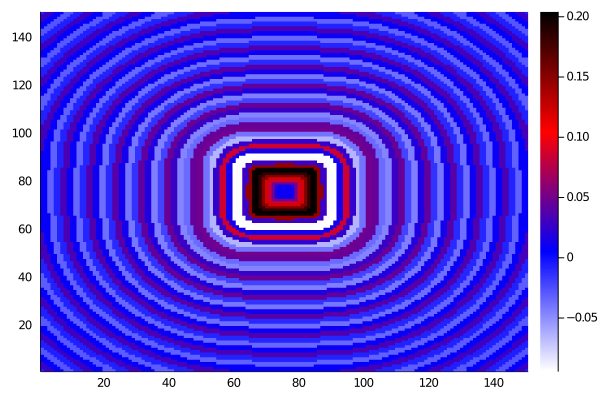

In [202]:
heatmap(1:2*size,1:2*size,map,color=cgrad([:white,:blue,:red,:black]))

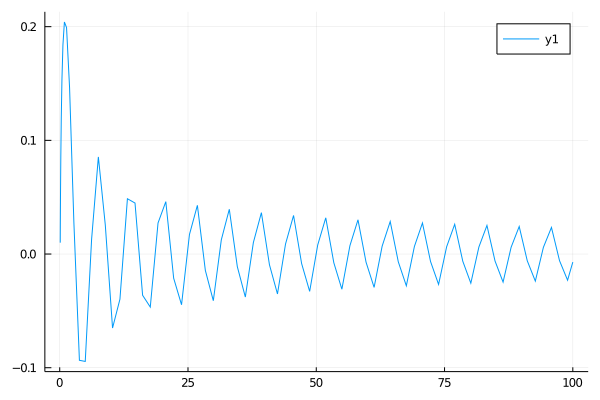

In [203]:
plot(x_sol,y_sol)